### Churn Analysis

**Tasks to be performed**
- 1 Data Cleaning(Non-Graded Component)
    - 1.1 Load the data

- 2 Data Preparation (25 Marks)

    - 2.1 Drop variables that will not be used for the classification model: state, area code, phone number, customer service calls (2 Marks)
    - 2.2 Replace yes with 1 and no with 0 for the following columns: international plan, voice mail plan (3 Marks)
    - 2.3 Split the data into X and y, where X will have all the independent features and y will have the dependent feature(churn) (3 Marks)
    - 2.4 Check the imbalance percentage: what percentage of churn customer we have in the data? (3 Marks)
    - 2.5 Randomly split the data into train and test. Use the following paramters: train_size=0.7, test_size=0.3, random_state=100 (3 Marks)
    - 2.6 Build Random Forest Model with the following hyperparamters:(3 Marks)
        - bootstrap=True,
        - max_depth=100,
        - min_samples_leaf=100, 
        - min_samples_split=200,
        - max_features=0.4,
        - n_estimators=700,
        - class_weight = 'balanced',
        - criterion='entropy'
    - 2.7 Train the model on train data and check the sensitivity and roc_auc_score of the model on the test data (3 Marks)
    - 2.8 Check the feature importance according to the Random Forest Model and explain the features and their importance to FREECELL based on the results generated. Add your recommendations and suggestions to the FreeCell team (5 Marks)

In [2]:
# 1. Read the file
import os     
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

pd.set_option('display.max_columns', 50)

churn=pd.read_csv('telcom.csv')


# Checking top 5 rows
churn.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
churn.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Analysis- 2.1
# Here we will be dropping those variables which will not be useful for building up the classification model.
# Write your code to drop the following columns: (state, area code, phone number, customer service calls) from the churn dataframe
# update the churn dataframe such that it doesn't contain the above mentioned columns

# Write your code here
churn.drop(churn.columns[[0,2,3,19]], axis=1, inplace=True)




In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account length         3333 non-null   int64  
 1   international plan     3333 non-null   object 
 2   voice mail plan        3333 non-null   object 
 3   number vmail messages  3333 non-null   int64  
 4   total day minutes      3333 non-null   float64
 5   total day calls        3333 non-null   int64  
 6   total day charge       3333 non-null   float64
 7   total eve minutes      3333 non-null   float64
 8   total eve calls        3333 non-null   int64  
 9   total eve charge       3333 non-null   float64
 10  total night minutes    3333 non-null   float64
 11  total night calls      3333 non-null   int64  
 12  total night charge     3333 non-null   float64
 13  total intl minutes     3333 non-null   float64
 14  total intl calls       3333 non-null   int64  
 15  tota

In [8]:
churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,False


In [9]:
# Analysis- 2.2
# Here we will be replacing the values yes and no with 1 and 0 respectively for the columns 'international plan' and 'voice mail plan'
# This is required because, we will not be able to train the model with string values 'yes' and 'no'

# Write your code here
# Hint: https://stackoverflow.com/a/40901792

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account length         3333 non-null   int64  
 1   international plan     3333 non-null   object 
 2   voice mail plan        3333 non-null   object 
 3   number vmail messages  3333 non-null   int64  
 4   total day minutes      3333 non-null   float64
 5   total day calls        3333 non-null   int64  
 6   total day charge       3333 non-null   float64
 7   total eve minutes      3333 non-null   float64
 8   total eve calls        3333 non-null   int64  
 9   total eve charge       3333 non-null   float64
 10  total night minutes    3333 non-null   float64
 11  total night calls      3333 non-null   int64  
 12  total night charge     3333 non-null   float64
 13  total intl minutes     3333 non-null   float64
 14  total intl calls       3333 non-null   int64  
 15  tota

In [11]:
churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,False


In [12]:
def numericalise(churn):
    churn = churn.copy()
    for col in churn.select_dtypes(include='O').columns:
        churn[col] = churn[col].astype("category").cat.codes
    return churn

In [13]:
churnN= numericalise(churn)
churnN.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,False


In [14]:
churnN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account length         3333 non-null   int64  
 1   international plan     3333 non-null   int8   
 2   voice mail plan        3333 non-null   int8   
 3   number vmail messages  3333 non-null   int64  
 4   total day minutes      3333 non-null   float64
 5   total day calls        3333 non-null   int64  
 6   total day charge       3333 non-null   float64
 7   total eve minutes      3333 non-null   float64
 8   total eve calls        3333 non-null   int64  
 9   total eve charge       3333 non-null   float64
 10  total night minutes    3333 non-null   float64
 11  total night calls      3333 non-null   int64  
 12  total night charge     3333 non-null   float64
 13  total intl minutes     3333 non-null   float64
 14  total intl calls       3333 non-null   int64  
 15  tota

In [15]:
# Ananlysis- 2.3
# Create the variable X and y
# X will have all the columns from the dataframe churn while y will only have the 'churn' column from the dataframe churn

# Write your code here

In [16]:
# Putting feature variable to X
X = churnN.drop('churn',axis=1)

# Putting response variable to Y
Y = churnN['churn']

In [17]:
X.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [18]:
Y.head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [19]:
# Analysis- 2.4
# Find out the percentage or rows where churn=1 and churn=0. If the percentage is anything other than 50%-50%,
# we call that data as an imbalace data

# Write your code here

In [20]:
churnN["churn"] = churnN["churn"].astype(int)

In [21]:
churnN.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0


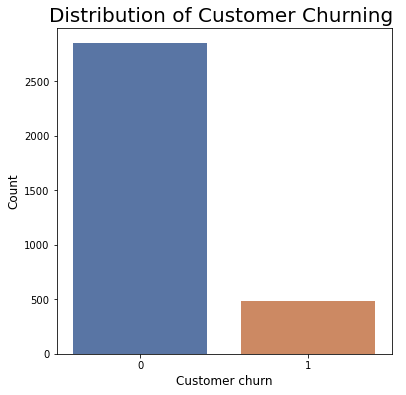

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x = churnN.churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)

plt.show()

In [23]:
churnN['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [24]:
# ~ 86% of the dataset is not chruning and 14% is churning.

In [25]:
# Analysis- 2.5
# Here we will be splitting the data into train and test
# The train data will be having 70% of the churn data while test will have 30% of the churn data
# Use the following paramters
# train_size=0.7, test_size=0.3, random_state=100

from sklearn.model_selection import train_test_split
# Write your code here

# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((2333, 16), (1000, 16))

In [27]:
Y_train.shape, Y_test.shape

((2333,), (1000,))

In [28]:
# Analysis- 2.6
# Here we will training our Random Forest model.
# Please use the paramters provided over the question.

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [29]:
rfc= RandomForestClassifier(bootstrap = True, max_depth=100, min_samples_leaf=100, min_samples_split =200, max_features=0.4, n_estimators=700, class_weight='balanced', criterion ='entropy')

In [30]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100, max_features=0.4, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=700)

In [31]:
# Analysis-2.7
# Here we need to check the performance of the trained model
# Check the ROC_AUC Score

from sklearn import metrics
Y_pred = rfc.predict(X_test)

# Write your code here

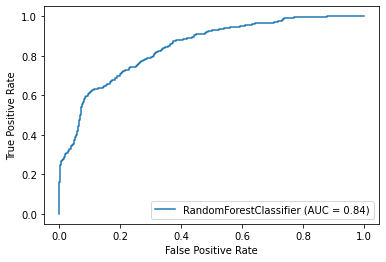

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, X_train, Y_train)
plt.show()

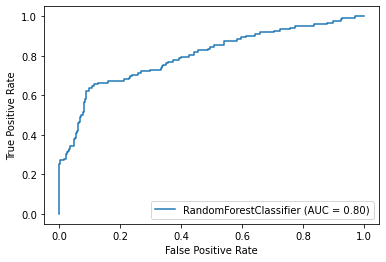

In [33]:
plot_roc_curve(rfc, X_test, Y_test)
plt.show()

In [34]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.95      0.85      0.90       878
        True       0.38      0.66      0.48       122

    accuracy                           0.83      1000
   macro avg       0.66      0.76      0.69      1000
weighted avg       0.88      0.83      0.85      1000



In [35]:
accuracy_score(Y_test,Y_pred)

0.826

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X,Y,cv =20, scoring='accuracy')

In [43]:
scores

array([0.77844311, 0.82634731, 0.78443114, 0.85628743, 0.80838323,
       0.81437126, 0.78443114, 0.80838323, 0.81437126, 0.86826347,
       0.83832335, 0.88023952, 0.82035928, 0.78313253, 0.78915663,
       0.87951807, 0.81927711, 0.8253012 , 0.86144578, 0.81927711])

In [44]:
print("Mean:{}".format(scores.mean()))

Mean:0.822987158213693


In [ ]:
#The accuracy of the model did not increase rather remained the same even upon using an ensemble model to enhance it accuracy.

In [36]:
# Analysis-2.8
# Here we will be printing the feature importance of the model together with the variables
# You are not required to write anything here. The code is already provided
import pandas as pd
important_features = pd.Series(data=rfc.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

total day minutes        0.289122
total day charge         0.280156
international plan       0.124712
total intl calls         0.044824
total eve minutes        0.038065
total eve charge         0.036557
total intl charge        0.031768
total intl minutes       0.028817
total night minutes      0.022940
total night charge       0.022604
total eve calls          0.015463
total day calls          0.015429
number vmail messages    0.014579
account length           0.014004
total night calls        0.011745
voice mail plan          0.009214
dtype: float64

In [37]:
# Analyze the above results and explain the model to the FREECELL company

# Add at least 5 recommendations for FREECELL company

<AxesSubplot:>

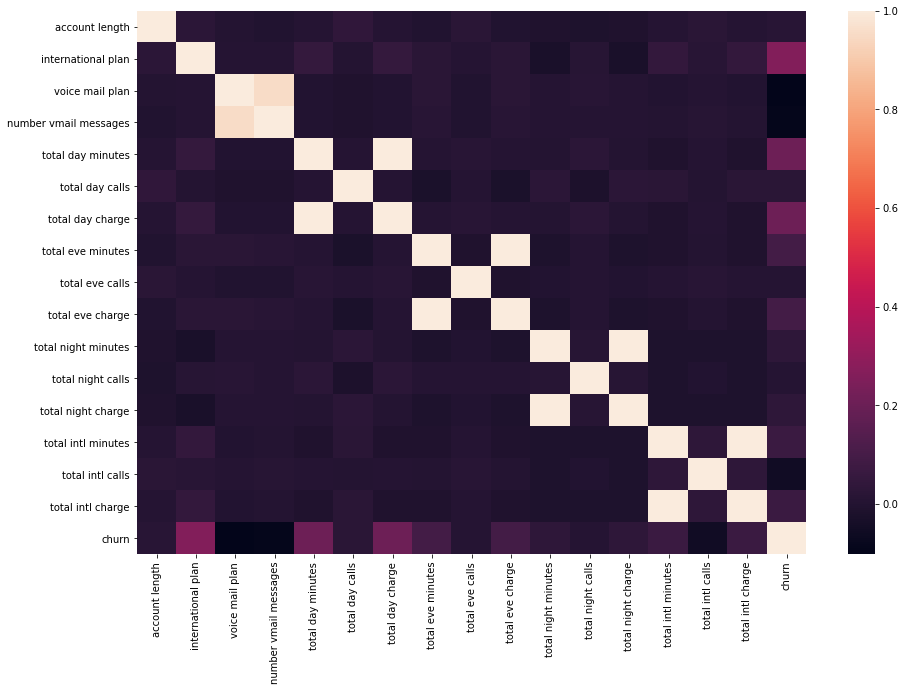

In [45]:
churn_correlation = churnN.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(churn_correlation,xticklabels=churn_correlation.columns,yticklabels=churn_correlation.columns)

In [46]:
# from the above correlation plot we can see that dropping parameter may not likely improve the accuracy of the model.

In [48]:
#Feature importance scores can help interpret data, they aid by directly helping in ranking and selecting  features that are most useful/impactful to a predictive model.In the above example we can re-run the model identifying the most useful features ( eg : top 5)and evaluate the improvement in the model accuracy score.In the above model churn is somewhat correlated to the the top 3 features (total day minutes, total day charge,international plan)


In [58]:
## Additinal analyses to support recommendation

In [65]:
Recommendation3 = churnN.groupby("churn")['international plan'].value_counts(normalize=False).unstack()
Recommendation3

international plan,0,1
churn,,
0,2664,186
1,346,137


<AxesSubplot:title={'center':'total day minutes'}, xlabel='churn'>

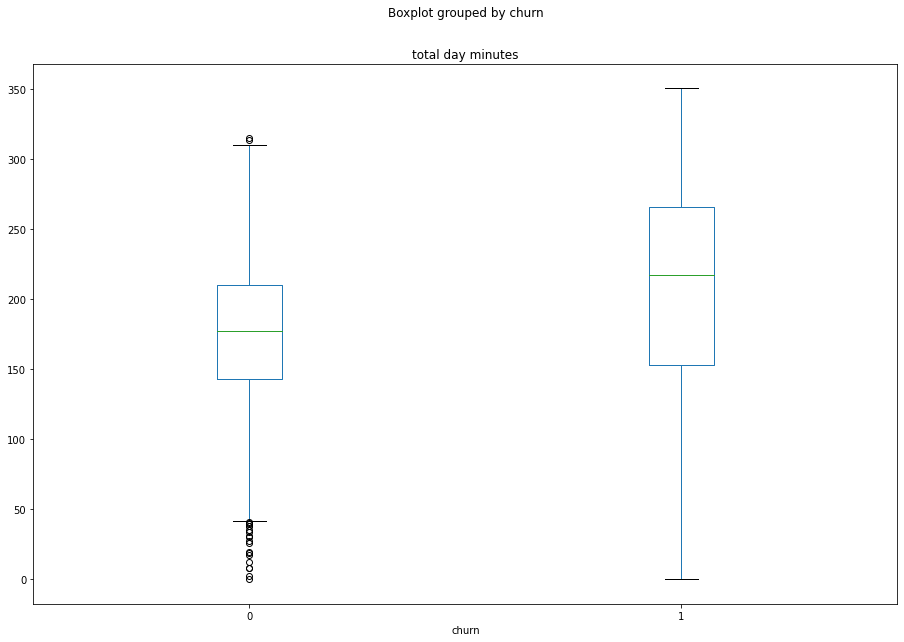

In [67]:
Recommendation1=churnN.boxplot(by ='churn', column =['total day minutes'], grid = False)
Recommendation1

<AxesSubplot:title={'center':'total day charge'}, xlabel='churn'>

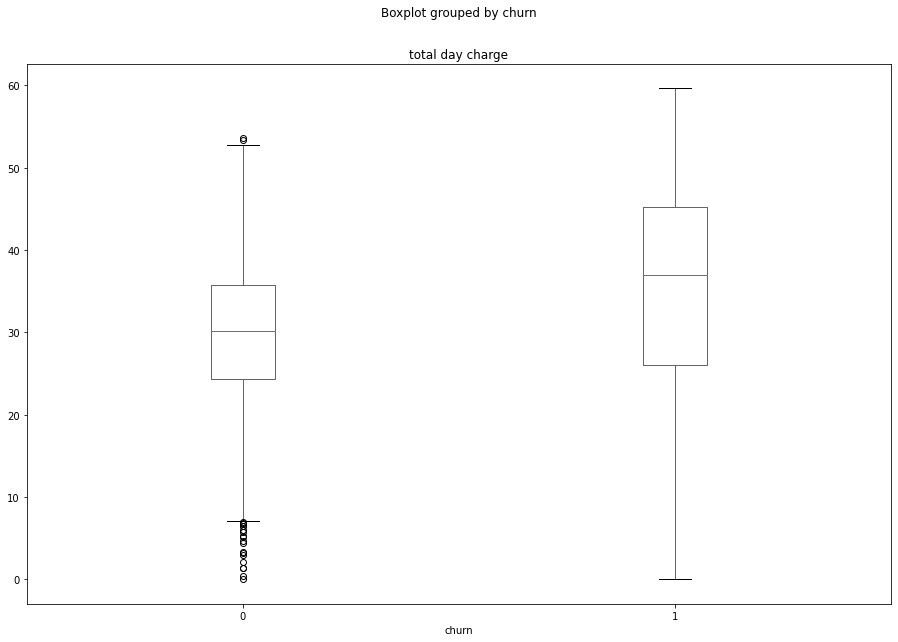

In [68]:
Recommendation2= churnN.boxplot(by ='churn', column =['total day charge'], grid = False)
Recommendation2

<AxesSubplot:title={'center':'total eve minutes'}, xlabel='churn'>

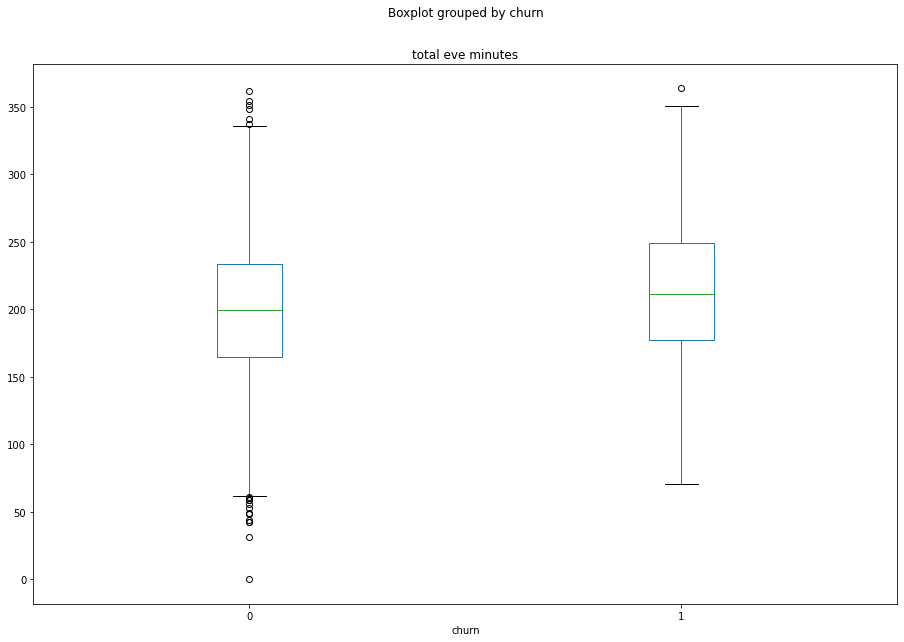

In [70]:
Recommendation4= churnN.boxplot(by ='churn', column =['total eve minutes'], grid = False)
Recommendation4

In [ ]:
## The strategies to avoid churn could look at: (recommendations)
##1) Total day minutes of usage - have attractive offers eg: 5 mins local call free per day 
##2) Those churning seem to have a higher total day minutes and total day charge invariably, giving offers like susbidized rates for longer duration will help, encouraing long users to continue with the network.
##3) Increase offers to encourage customers subscribe to international plans , like ease of activation, customised packages, multiple country cover/zone rates rather than individual country rates.
##4) Provide ease of use during even hours , interruption free network and offers to facilitate loger use during evenings
##5) promote subsidized rates/have offers for evening calls 